## Vector Autoregression (VAR)

กลุ่ม default lib

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

In [2]:
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

In [3]:
from statsmodels.tsa.api import VAR
import statsmodels.api as sm
from statsmodels.tsa.base.datetools import dates_from_str

ประกาศ methods

In [4]:
def split_data(df, split_date):
    return df[df.index <= split_date].copy(), \
           df[df.index >=  split_date].copy()

In [7]:
def z_standardization(df_col):
    for col in df_col.columns:
        col_zscore = col + '_ZS'
        df_col[col_zscore] = (df_col[col] - df_col[col].mean())/df_col[col].std(ddof=0)
    for col in df_col.columns:
        if not col.endswith('_ZS'):
            df_col.drop(col, axis=1,inplace = True)
    return df_col

Create dataframe
- Split and Graph Train & Test data

In [155]:
root = Path('aggregated_data')
joinData_file = 'aggregate_data.csv'   # Original aggregate file
joinData_df = pd.read_csv(root / joinData_file,index_col=0)
joinData_df.sort_index(inplace=True)

In [156]:
train, test = split_data(joinData_df, '2008-01-31')

In [157]:
train = z_standardization(train)    # VSPP has NaN Value make VAR() Error
test = z_standardization(test)      # VSPP hasn't NaN Value

In [158]:
model = VAR(test,freq='M')

In [159]:
results = model.fit(maxlags=7, ic='aic')

In [160]:
lag_order = results.k_ar
nobs = 7
rs = results.forecast(test.values[-lag_order:], nobs)

In [164]:
df_forecast = pd.DataFrame(rs, index=test.index[-nobs:], columns=test.columns)
df_forecast

,NG CONS EGAT_ZS,NG CONS GSP_ZS,NG CONS IPP_ZS,NG CONS Industry_ZS,NG CONS NGV_ZS,NG CONS SPP_ZS,NG PRD Domestic_ZS,NG PRD Import_ZS,POWGEN DEDP_ZS,POWGEN EGAT_ZS,POWGEN IPP_ZS,POWGEN Import_ZS,POWGEN SPP_ZS,POWGEN VSPP_ZS
DS,,,,,,,,,,,,,,
2018-06-30,-2.419608,0.733303,-3.060135,1.017352,-0.431247,2.000423,-0.076155,-1.133832,-0.825893,-1.803227,-2.411674,1.103598,1.987400,1.683494
2018-07-31,-1.760167,0.652054,-1.168542,1.118244,-0.006864,1.893963,-0.373721,1.216522,-1.061190,-1.933489,-1.011391,1.673790,1.758061,1.684473
2018-08-31,-0.695104,0.942605,-2.063979,1.134083,-0.216024,1.856888,0.065811,1.902548,-0.759294,-0.465253,-1.853942,1.460879,1.868574,1.741332
2018-09-30,-1.018144,2.004373,-2.190964,1.414701,-0.469086,1.977316,0.487094,0.828777,-0.583758,-0.601786,-1.607551,1.432725,1.976050,1.663660
2018-10-31,-1.196357,1.192691,-2.099538,0.801531,-0.156313,2.019091,-0.295883,0.656055,-0.396057,-0.179507,-2.081905,1.400266,1.995660,1.637484
2018-11-30,-0.816157,1.124078,-2.044656,0.635802,-0.311270,1.915328,-0.025225,0.168736,-1.238597,-0.260367,-1.599659,1.084371,1.902869,1.622883
2018-12-31,-1.327972,1.042137,-0.204487,0.824903,-0.288362,1.778453,-0.377784,1.974826,-1.591395,-1.326150,-0.589681,0.737105,1.710708,1.615234


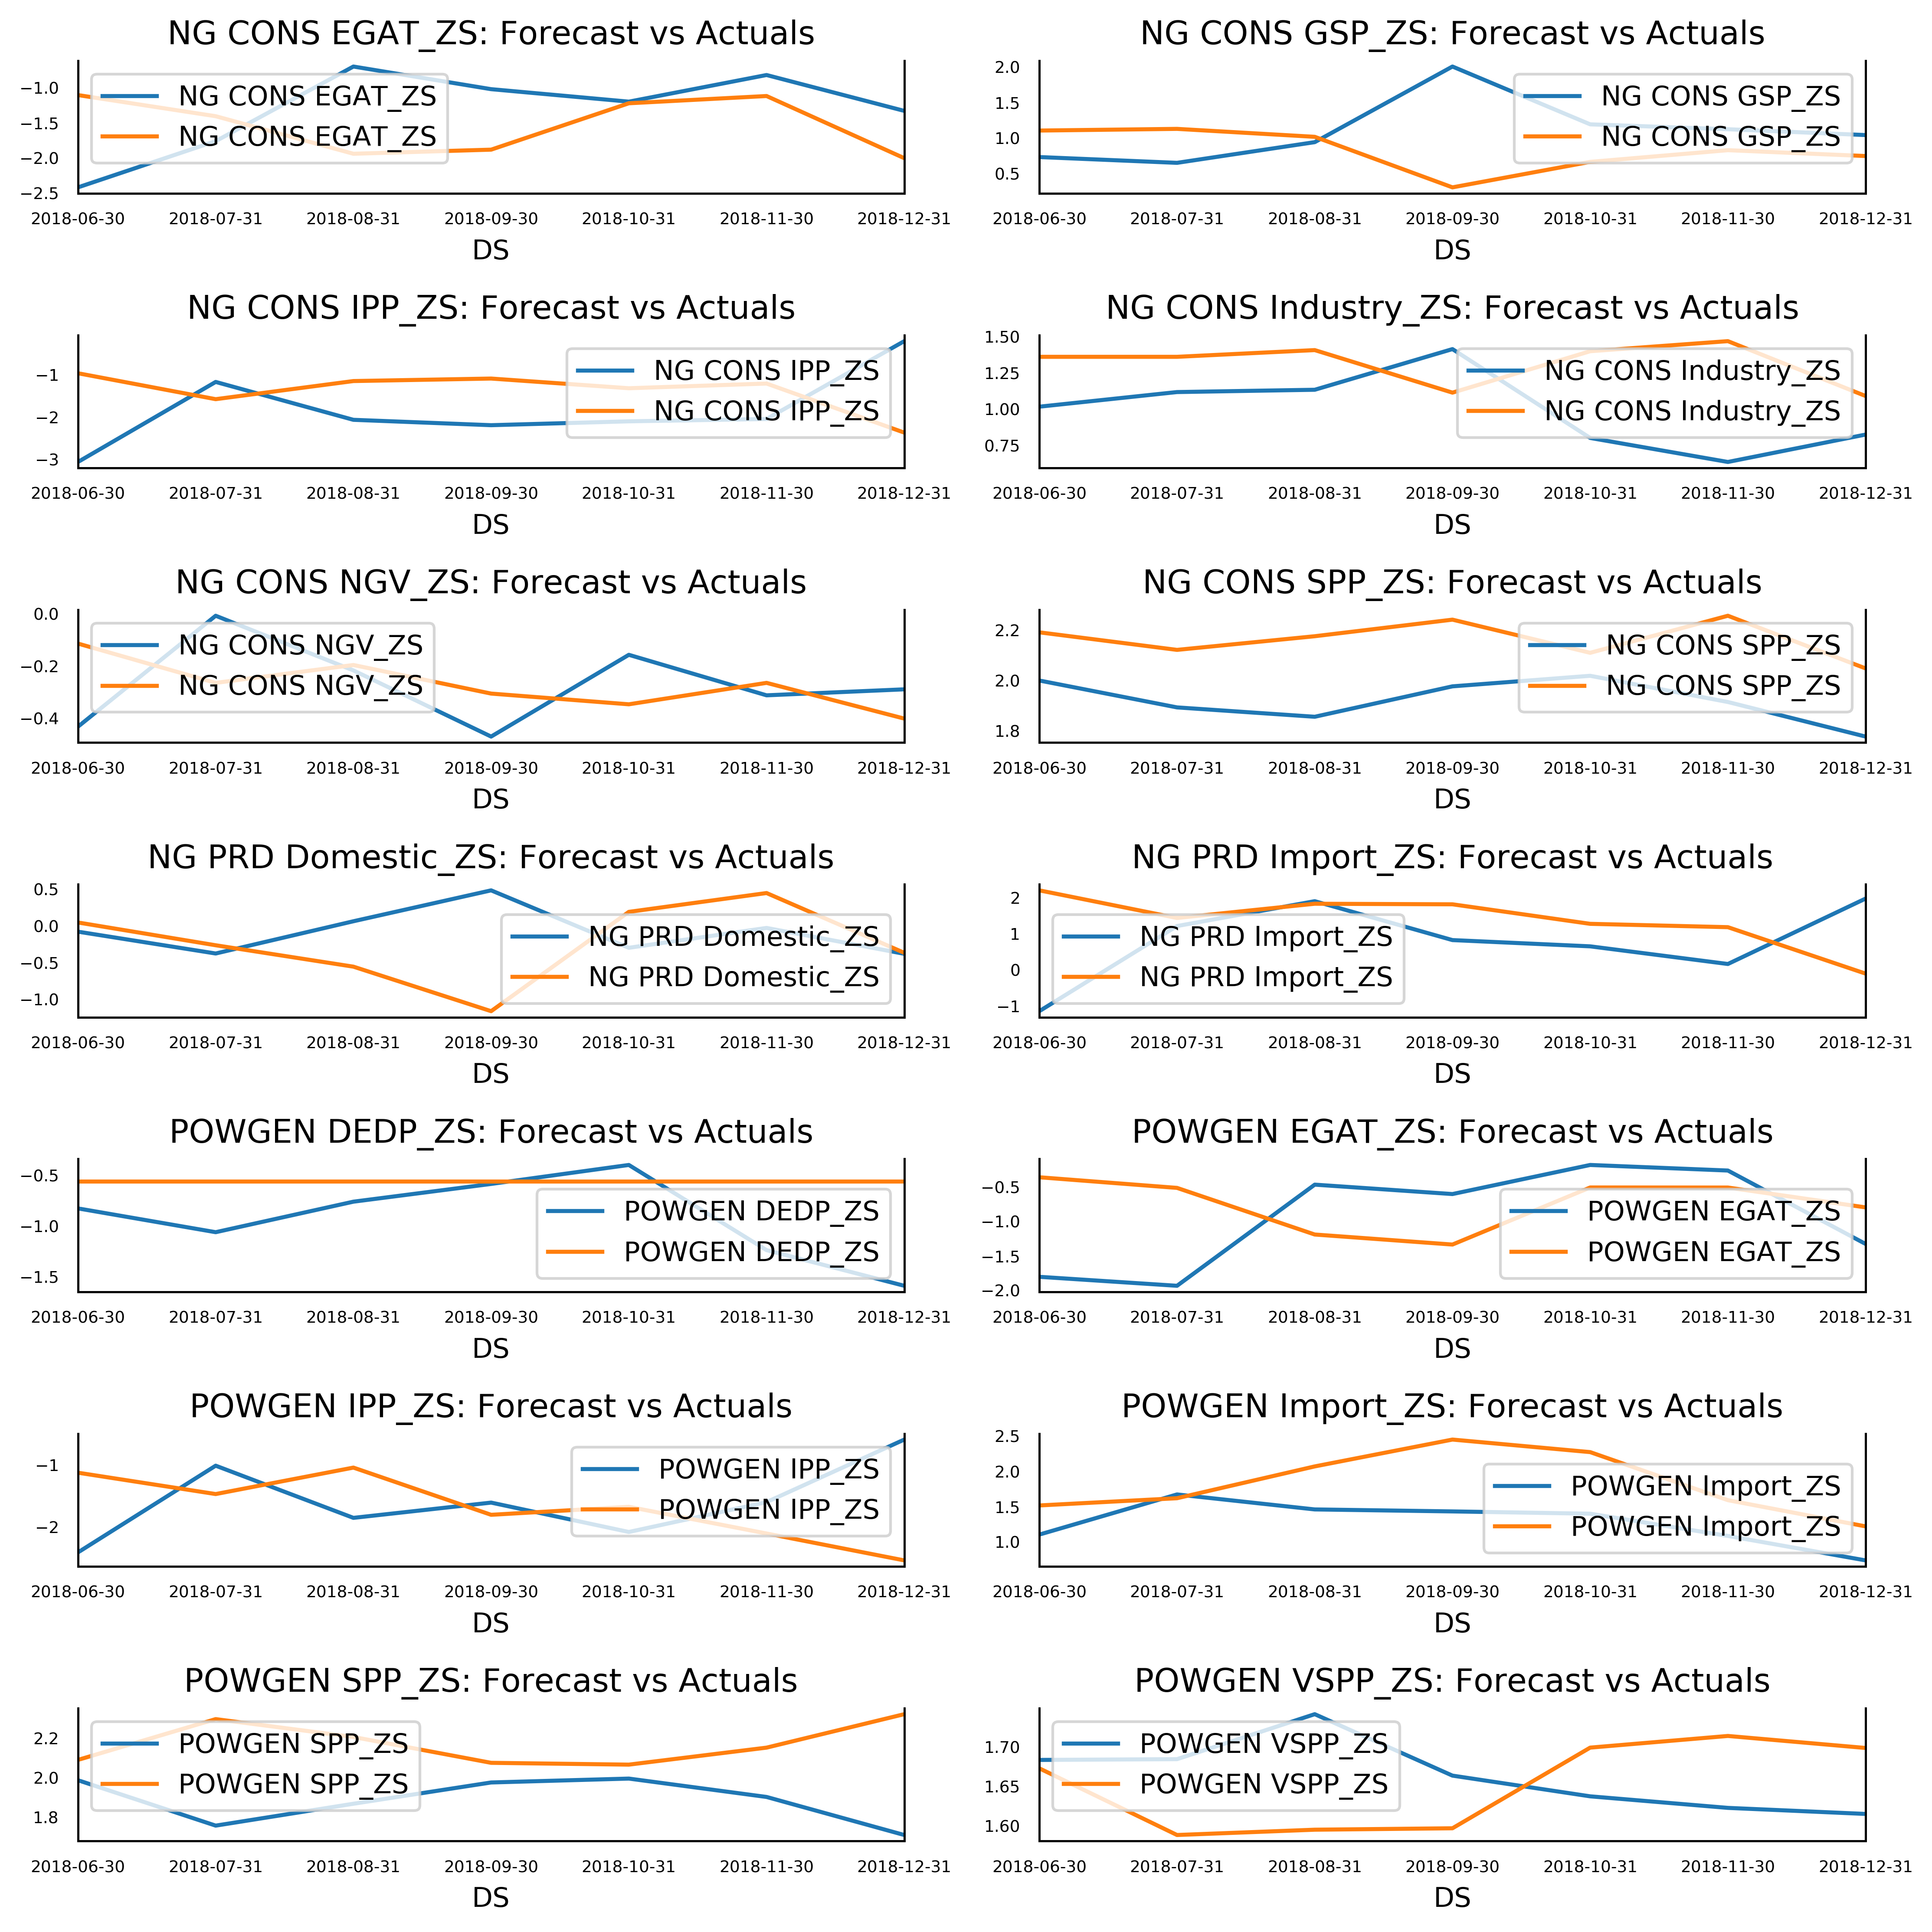

In [165]:
fig, axes = plt.subplots(nrows=int(len(df_forecast.columns)/2), ncols=2, dpi=450, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df_forecast.columns, axes.flatten())):
    df_forecast[col].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    test[col][-nobs:].plot(legend=True, ax=ax).autoscale(axis='x',tight=True);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();